<a href="https://colab.research.google.com/github/Avani-Agarwal1999/MACHINE-LEARNING-CS391L/blob/main/ICA/aa88539_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import numpy as np
from numpy import linalg as la
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
def ICA(X, W, ETA=0.000001, MAX_ITER=1000):

    n,m = W.shape
    m,t = X.shape
    
    print(f'Running ICA...')
    print(f'eta={ETA} and R_max={MAX_ITER}')
    
    start_time = time.time()
    for i in range(0, int(MAX_ITER)):
        # Estimate of U
        Y = W@X         # (n,t)

        # find delW
        Z = 1/(1 + np.exp(-Y))   # (n,t)
        delW = ETA*((np.identity(n)*t + (1 - 2*Z)@Y.T) @W)
        
        # update W
        W += delW
    end_time = round(time.time() - start_time, 4)
    print(f'Completed ICA in {end_time} sec')
    
    return W


COLOR = ['b','g','r','c','k']
def plots(A, spacing=None, title=None):   
    
    n,_ = A.shape
    Anorm = norm(A,spacing)
    
    fig = plt.figure(figsize=(16,8))
    ax = plt.gca()
    for i in range(0,n):
        plt.plot(Anorm[i][:40], COLOR[i])
        vis = False if i < n-1 else True
        ax.axes.xaxis.set_visible(vis)
    
    if title: ax.set_title = title
        
    plt.show()

def norm(A,spacing):
    Anorm = []
    
    mi = min(map(min, A))
    ma = max(map(max, A))
    
    s = spacing if spacing is not None else 0
    
    for i in range(len(A)):
        Anorm.append(s*i + (A[i]-mi) / (ma-mi))
        
    return Anorm

def correlation_coefficient(T1, T2):
    numerator = np.mean((T1 - T1.mean()) * (T2 - T2.mean()))
    denominator = T1.std() * T2.std()
    if denominator == 0:
        return 0
    else:
        result = numerator / denominator
        return result

In [3]:
np.random.seed(8)

# Load data
data = loadmat('sound.mat')['sounds']

U = data[:3][:]
n,t = U.shape
m = n

# Mix signals and create W_init
A = np.random.rand(m,n)
X = A@U
W_init = np.random.rand(n,m)
W = ICA(X, W_init/100, ETA=0.000001, MAX_ITER=1000)
rec = W@X

Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 6.0978 sec


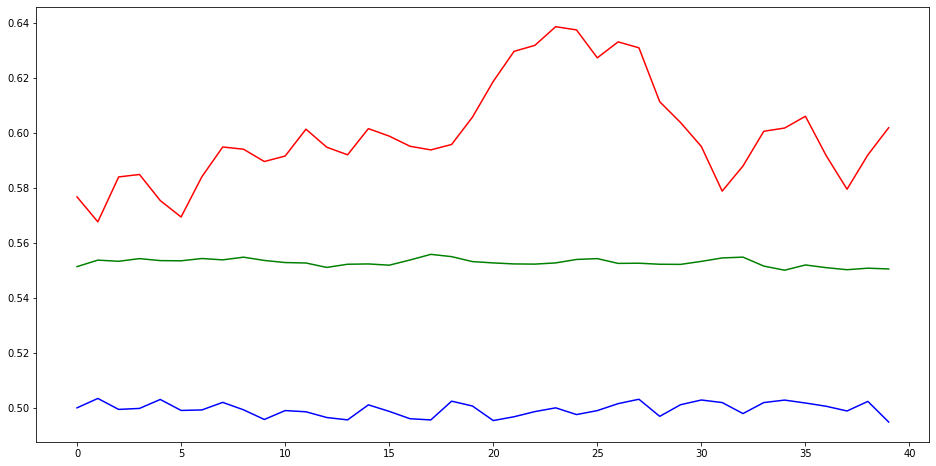

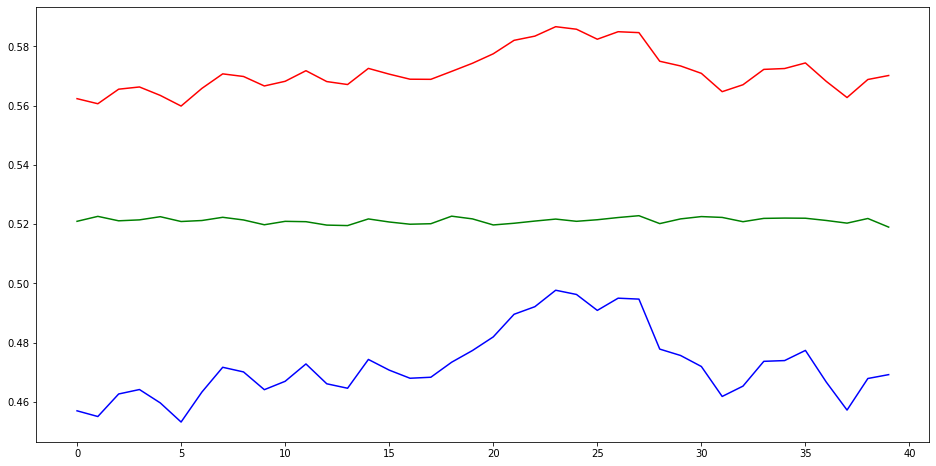

In [4]:
plots(U,0.05)
plots(X,0.05)

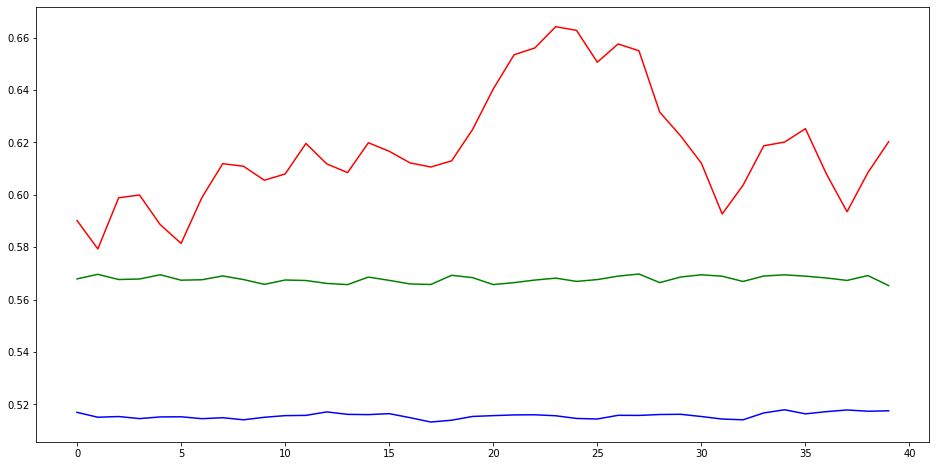

In [5]:
r = np.array([rec[1],rec[0],rec[2]])
plots(rec, 0.05)

In [6]:
for i in range(0,3):
  c = correlation_coefficient(U[0],r[i])
  print(round(c,4))

for i in range(0,3):
  c = correlation_coefficient(U[1],r[i])
  print(round(c,4))


for i in range(0,3):
  c = correlation_coefficient(U[2],r[i])
  print(round(c,4))


0.9999
0.0139
-0.0033
0.0072
-1.0
-0.0046
0.0005
-0.0042
1.0


m=5
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 10.1106 sec
Error: 500.96366715229095

m=6
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 10.1197 sec
Error: 522.8581270576146

m=7
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 10.2495 sec
Error: 525.4833959454766

m=8
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 10.2637 sec
Error: 521.3232007340547

m=9
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 10.3316 sec
Error: 524.0239915187126

m=10
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 10.4823 sec
Error: 500.95642030652544

m=11
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 10.5329 sec
Error: 538.7433056068352

m=12
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 10.6278 sec
Error: 522.6530456794976

m=13
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 10.6502 sec
Error: 525.3807892490396

m=14
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 10.7104 sec
Error: 522.0341079588658

m=1

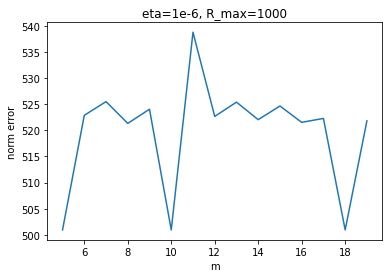

In [7]:
#best value of m
np.random.seed(8)

n = 5
U = data[:n,:]

m_TEST_results = []
m_TEST_errors = []

for m in range(n,20):
    print(f'm={m}')

    A = np.random.rand(m,n)
    W_init = np.random.rand(n,m)

    X = A@U
    W = ICA(X, W_init, ETA=0.000001, MAX_ITER=1000)

    rec = W@X
    m_TEST_results.append(rec)

    error = la.norm(rec-U,2)
    m_TEST_errors.append(error)
    print(f'Error: {error}\n')
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(range(5,20), m_TEST_errors)
ax.set_title('eta=1e-6, R_max=1000')
ax.set_xlabel('m')
ax.set_ylabel('norm error')

plt.show()

Running ICA...
eta=0.01 and R_max=1000000
Completed ICA in 25.9734 sec
Error is equal to 12.440088291067473


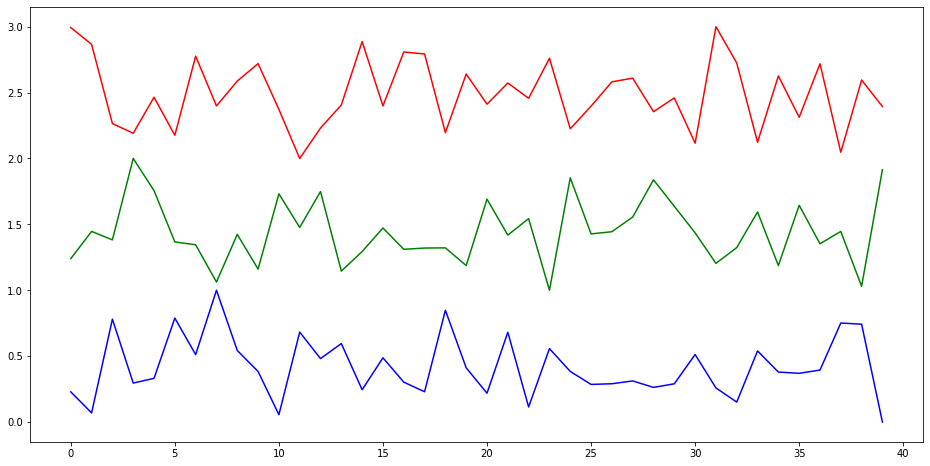

Original signals are displayed above


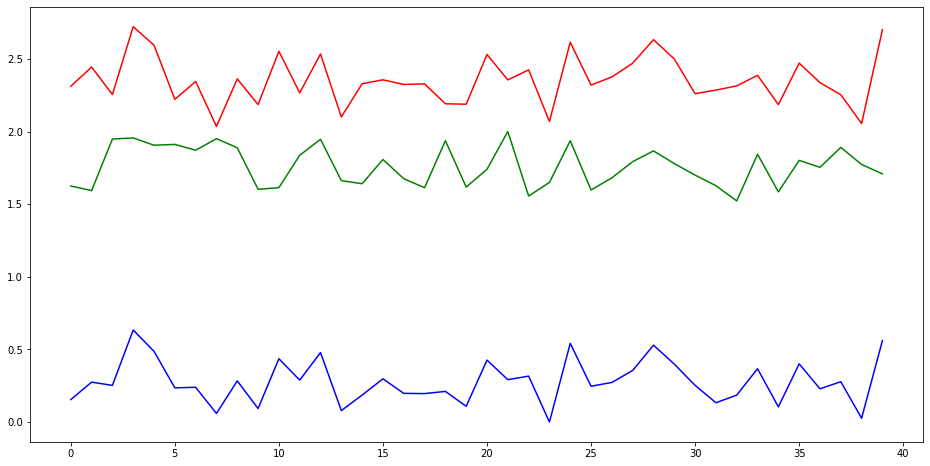

Mixed signals are displayed above


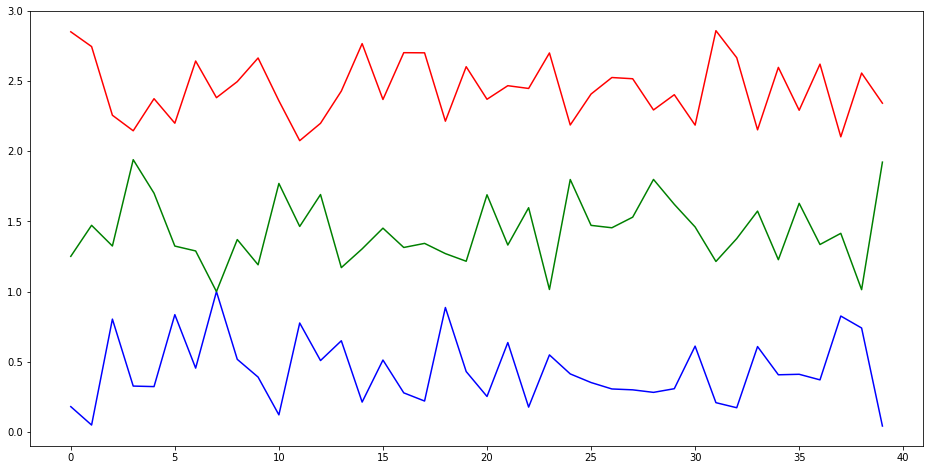

Recovered signals are displayed above
0.9867
0.9884
0.9912


In [8]:
np.random.seed(8)
U = loadmat('icaTest.mat')['U']
A = loadmat('icaTest.mat')['A']

m,n = A.shape
X = A@U
# ICA
W_init = np.random.rand(n,m)
W = ICA(X, W_init, ETA=0.01, MAX_ITER=1000000)

#Recovered_signals
rec = W@X

e = la.norm(rec-U,2)
print('Error is equal to', e)

plots(U, 1)
print("Original signals are displayed above")
plots(X, 1)
print("Mixed signals are displayed above")

r = np.array([rec[0],rec[2],-rec[1]])
plots(r, 1)
print("Recovered signals are displayed above")

for i in range(0,3):
  c = correlation_coefficient(U[i],r[i])
  print(round(c,4))
